# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [21]:
import pyforest
from scipy import stats
# lazy_imports()

In [2]:
# Your code here. 
student_data = pd.DataFrame({'X': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Y': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

<IPython.core.display.Javascript object>

Draw a dispersion diagram (scatter plot) for the data.

<IPython.core.display.Javascript object>

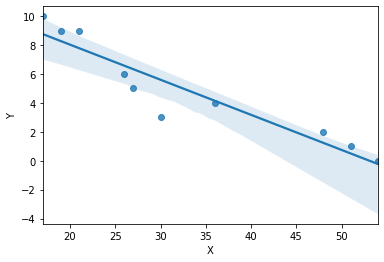

In [26]:
# Your code here.
sns.regplot(x='X', y='Y', data=student_data);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
# The graph indeed indicates a quite strong negative correlation between age and number of tardiness.
# This means the initial hypothesis is quite good.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [16]:
# Your response here.
print('Covariance between the two variables is:', np.cov(student_data['X'], student_data['Y'])[0][1])
print('Correlation between the two variables is:', student_data['X'].corr(student_data['Y']))

# Both covariance and correlation tell something about the relationship between the variables.
# Covariance indicates directional association, whereby a positive covariance means the variables vary/move in the same direction.
# A negative covariance tells the opposite, while a zero covariance. Covariance varies between -inf to + inf
# Correlation is a standardized measure often indicating how strong two variables are (linearly) correlated with each other.
# Correlation coefficient varies between -1 to 1, where negave and positive sign indicate negative and positive relationship, respectively
# In this case study, the numbers show that there is a strong negative relationship between age and the number of tardies

<IPython.core.display.Javascript object>

Covariance between the two variables is: -45.56666666666667
Correlation between the two variables is: -0.9391626886887122


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [76]:
# Your response here.
X = student_data['X']
Y = student_data['Y']
import statsmodels.api as sm
X = sm.add_constant(X) # add intercept 
model = sm.OLS(Y,X) 

results = model.fit()
predictions = results.predict(X)
compare = pd.DataFrame({'Actual':Y, 'Predicted':predictions})
melted_compare = compare.melt()
compare

<IPython.core.display.Javascript object>

,Actual,Predicted
0,10,8.760850
1,1,0.504944
2,5,6.332643
3,9,7.789567
4,4,4.147256
5,2,1.233406
6,9,8.275209
7,6,6.575463
8,0,-0.223518
9,3,5.604180


In [77]:
X

,const,X
0,1.0,17
1,1.0,51
2,1.0,27
3,1.0,21
4,1.0,36
5,1.0,48
6,1.0,19
7,1.0,26
8,1.0,54
9,1.0,30


Plot your regression model on your scatter plot.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

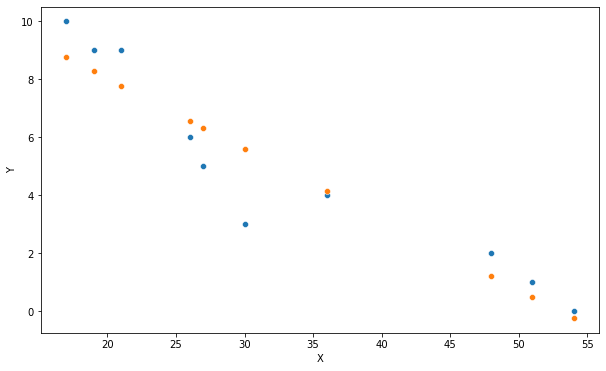

In [78]:
# Your code here.
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plt.sca(ax)
sns.scatterplot(x='X', y='Y', data=student_data);
sns.scatterplot(x=X['X'], y=predictions);

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [72]:
# Your response here. 
from sklearn.metrics import r2_score
print('The r-squared score of the model is:', r2_score(Y, predictions))

# The R-squared score is quite high indicating a strong correlation and that age can be a good predictor of tardiness.

The r-squared score of the model is: -1.1039482976676802


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set that you can download from [here](https://drive.google.com/file/d/1EyAN0RXmAM5OLzKcxyWqdExQJ3KiswO9/view?usp=sharing). Please place the data it in the provided data folder for this lab. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [ ]:
# Import any libraries you may need 

In [52]:
# Import the data
vehicles = pd.read_csv('../data/vehicles.csv')

<IPython.core.display.Javascript object>

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [53]:
# Your response here. 
relevant_cols = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']
vehicles_subset = vehicles[relevant_cols]
vehicles_subset.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
0,1984,4.0,19.388824,17,1950
1,1984,6.0,25.354615,13,2550
2,1985,4.0,20.600625,16,2100
3,1985,6.0,25.354615,13,2550
4,1987,6.0,20.600625,16,2550


In [54]:
vehicles_subset.corrwith(vehicles['CO2 Emission Grams/Mile'])

Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
dtype: float64

#### Comments:
- It appears that variable `Year` would provide the least amount of helpful information for predicting CO2 emissions, since the correlation is only -0.22
- Variable `Fuel Barrels/Year` would be the most important one in this prediction since it has the strongest correlation with the outcome variable

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [69]:
# Your response here. 
X = vehicles_subset.copy()
Y = vehicles['CO2 Emission Grams/Mile']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
predictions = results.predict(X)
print('The r-squared score of our model is:', r2_score(Y, predictions))

The r-squared score of our model is: 0.9808734920269122


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [70]:
# Your response here. 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                             17:02:55   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [64]:
# Your code here. 
party = pd.DataFrame({'Invited': [1, 3, 4, 6, 8, 9, 11, 14], 'Attended': [1, 2, 4, 4, 5, 7, 8, 13]})

<IPython.core.display.Javascript object>

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<IPython.core.display.Javascript object>

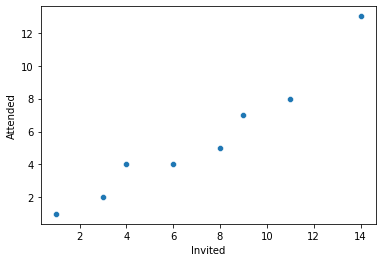

In [63]:
# Your code here.
sns.scatterplot(x='Invited', y='Attended', data=party);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [65]:
party_X = party['Invited']
party_Y = party['Attended']
model = sm.OLS(party_Y, party_X)
results = model.fit()

In [66]:
results.summary()

/Users/etienne_nl/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Attended   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              320.2
Date:                Sat, 17 Jul 2021   Prob (F-statistic):                    4.20e-07
Time:                        16:38:19   Log-Likelihood:                         -11.017
No. Observations:                   8   AIC:                                      24.03
Df Residuals:                       7   BIC:                                      24.11
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Invited        0.8015      0.045     17.895      0.000       0.696       0.907
==============================================================================
Omnibus:                        1.458   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.482   Jarque-Bera (JB):                0.655
Skew:                           0.664   Prob(JB):                        0.721
Kurtosis:                       2.547   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Your response here. 
- The plot simply shows a strong positive correlation between the number of invited and attended. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 